# Homework 04
For questions 2-6, please use hw4.zip, which contains a data base of patient/hopsital data.

## Question 1
*For this question, you can either import these tables into R and do each join, or create the tables we expect to see in a Markdown cell.*   
Please see the tables below.  

In [ ]:

library(tidyverse)

table_a <- tibble(
  SKU = c(102345, 104567, 108912, 109876, 112233),
  Fruit = c("Apple", "Orange", "Mango", "Blueberry", "Watermelon"),
  Color = c("Red", "Orange", "Yellow", "Blue", "Green"),
  Price = c(1.20, 1.40, 1.70, 3.50, 4.40),
  In_Stock = c("Yes", "Yes", "No", "Yes", "No")
)

table_b <- tibble(
  SKU = c(102345, 105432, 106789, 104567, 107654),
  Fruit = c("Apple", "Banana", "Grape", "Orange", "Pear"),
  Color = c("Red", "Yellow", "Purple", "Orange", "Green"),
  Sale_Price = c(1.00, 0.50, 2.00, 1.20, 1.10),
  Number_in_Stock = c(50, 120, 0, 75, 0)
)
print(table_b)
print(table_a)

# A tibble: 5 × 5
     SKU Fruit  Color  Sale_Price Number_in_Stock
   <dbl> <chr>  <chr>       <dbl>           <dbl>
1 102345 Apple  Red           1                50
2 105432 Banana Yellow        0.5             120
3 106789 Grape  Purple        2                 0
4 104567 Orange Orange        1.2              75
5 107654 Pear   Green         1.1               0
# A tibble: 5 × 5
     SKU Fruit      Color  Price In_Stock
   <dbl> <chr>      <chr>  <dbl> <chr>   
1 102345 Apple      Red      1.2 Yes     
2 104567 Orange     Orange   1.4 Yes     
3 108912 Mango      Yellow   1.7 No      
4 109876 Blueberry  Blue     3.5 Yes     
5 112233 Watermelon Green    4.4 No      


What would the result be if you did...  
a) Left join  
b) Right join  
c) Inner join  
d) Full join  
e) Semi join  
f) Anti join  

In [ ]:
#left join

library(dplyr)

library(tidyverse)

table_a <- tibble(
  SKU = c(102345, 104567, 108912, 109876, 112233),
  Fruit = c("Apple", "Orange", "Mango", "Blueberry", "Watermelon"),
  Color = c("Red", "Orange", "Yellow", "Blue", "Green"),
  Price = c(1.20, 1.40, 1.70, 3.50, 4.40),
  In_Stock = c("Yes", "Yes", "No", "Yes", "No")
)

table_b <- tibble(
  SKU = c(102345, 105432, 106789, 104567, 107654),
  Fruit = c("Apple", "Banana", "Grape", "Orange", "Pear"),
  Color = c("Red", "Yellow", "Purple", "Orange", "Green"),
  Sale_Price = c(1.00, 0.50, 2.00, 1.20, 1.10),
  Number_in_Stock = c(50, 120, 0, 75, 0)
)

leftJoin <- left_join(table_a, table_b, by = "SKU")
print(leftJoin)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# A tibble: 5 × 9
     SKU Fruit.x    Color.x Price In_Stock Fruit.y Color.y Sale_Price
   <dbl> <chr>      <chr>   <dbl> <chr>    <chr>   <chr>        <dbl>
1 102345 Apple      Red       1.2 Yes      Apple   Red            1  
2 104567 Orange     Orange    1.4 Yes      Orange  Orange         1.2
3 108912 Mango      Yellow    1.7 No       NA      NA            NA  
4 109876 Blueberry  Blue      3.5 Yes      NA      NA            NA  
5 112233 Watermelon Green     4.4 No       NA      NA            NA  
# ℹ 1 more variable: Number_in_Stock <dbl>


## Question 2
Inspect the data sets in our database!  
a) Import them.  
b) Check out the columns and their variable types using one of R's tibble summary functions.

library(tibble)

glimpse(demographics)


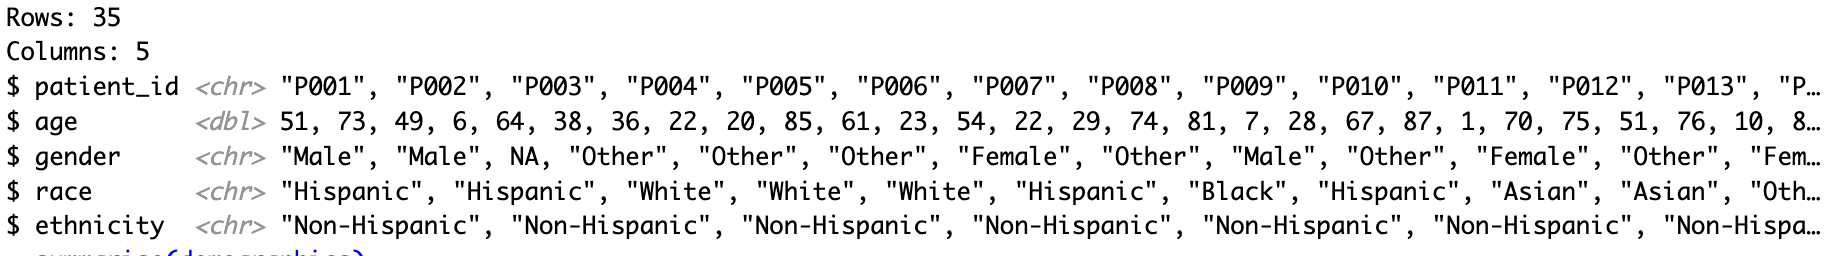

or can also be seen through:

head(demographics,3)

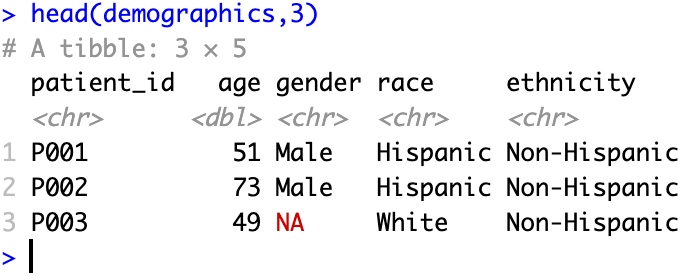

## Question 3
Using the `full.csv` data set from our database, **pivot longer** by making all of the variables the same type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of observations per `patient ID`/`name`. (*Hint: We did this in lecture 5!*)  



```
library(tidyverse)

full <- full %>%
+     mutate(across(-c(patient_id, name), as.character))

> full_long <- full %>%
+ pivot_longer(cols= -c(patient_id, name), names_to = "variale", values_to = "value", values_drop_na = TRUE)

> obs_per_patient <- full_long %>%
+ count(patient_id, name, name = "visits")

> head(obs_per_patient)
```
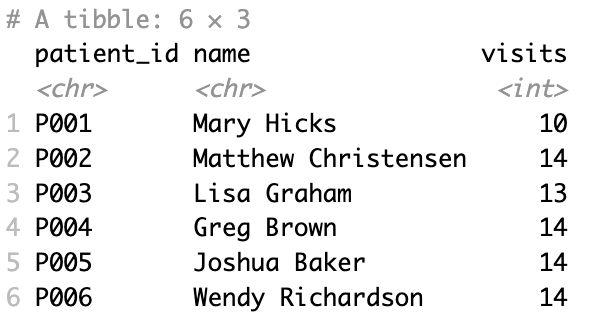

## Question 4
Pivot longer by making one column per data type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of each type of observation per `patient ID`/`name`.  

**Helpful Hints:**  
1. You're performing 3 seperate pivots with careful column selection then joining them after!  
2. After each pivot, add the code below to create a unique row number:  
```
%>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()
```
3. To greate the tally, add what is below after your grouping statement:   
```
%>%
summarise(
    n_chr  = sum(!is.na(value_chr)),
    n_num  = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
```



```
chr_pivot <- full %>%
  select(patient_id, name, gender, race, ethnicity, condition, treatment, department, hospital, patient_address, patient_city, patient_state) %>%
    pivot_longer(
    cols = -c(patient_id, name),
    names_to = "variable_chr",
    values_to = "value_chr"
    ) %>%
      group_by(patient_id, name) %>%
      mutate(row = row_number()) %>%
      ungroup()
    
num_pivot <- full %>%
  select(patient_id, name, age, patient_zipcode) %>%
    pivot_longer(
    cols = -c(patient_id, name),
    names_to = "variable_num",
    values_to = "value_num"
    ) %>%
      group_by(patient_id, name) %>%
      mutate(row = row_number()) %>%
      ungroup()
    
full_data <- chr_pivot %>%
   full_join(num_pivot, by = c("patient_id", "name", "row")) %>%
   full_join(date_pivot, by = c("patient_id", "name", "row"))
  
date_pivot <- full %>%
  select(patient_id, name, admission_date, release_date) %>%
    mutate(
      admission_date = as.Date(admission_date),
      release_date = as.Date(release_date)
    ) %>%
      pivot_longer(
      cols = -c(patient_id, name),
      values_to = "value_date",
      names_to = "variable_date"
      ) %>%
        group_by(patient_id, name) %>%
        mutate(row = row_number()) %>%
        ungroup()
      
tally <- full_data %>%
  group_by(patient_id, name) %>%
  summarize(
    n_chr = sum(!is.na(value_chr)),
    n_num = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
  )

head(full_data, 10)
```
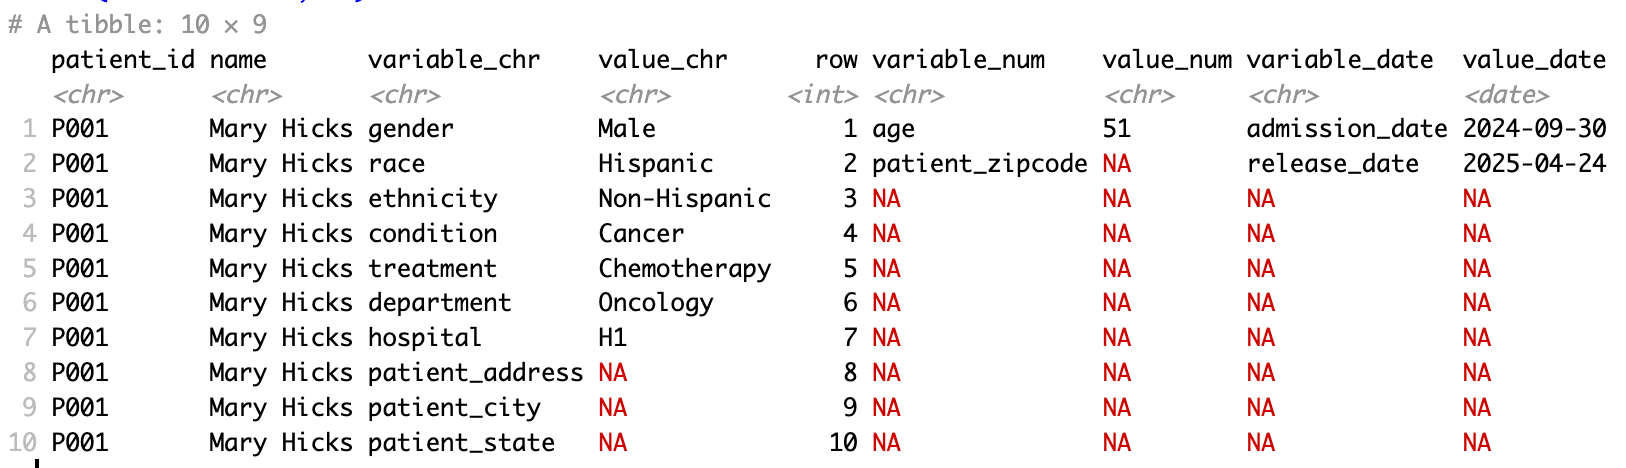


## Question 5
Match patient names to the name of the hospital they were treated at.  
*Hint: You'll need `patient_names.csv` and `hospitals.csv`.*



```
merge <- patient_names %>%
left_join(hospitals, by = "hospital_id") %>%
select(patient_id, name, hospital_name)
head(merge)
```

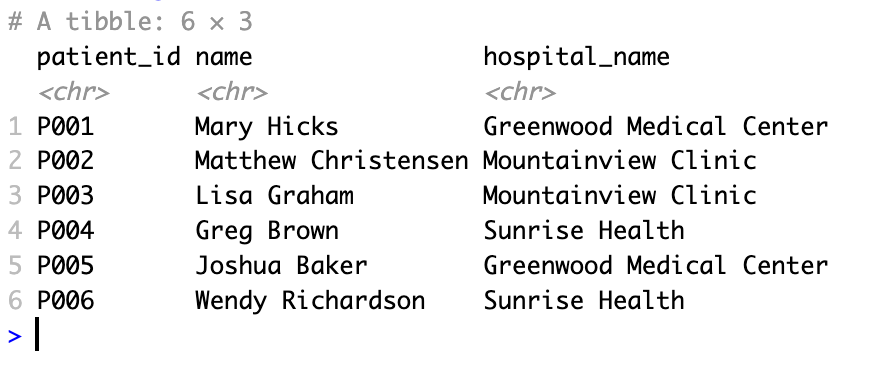

## Question 6

Using joins, create a table that shows `patient_id`, `name`, `age`, `gender`, `condition`, and `treatment`.   
*Hint: You'll need `patient_names.csv`, `demographics.csv`, and `treatment_info.csv`.*



```
patient_og <- patients %>%
left_join(demographics, by = "patient_id")

patient <- patient_og %>%
left_join(treatments, by = "condition_id")

patient_info <- patient %>%
select(patient_id, name, age, gender, condition, treatment)

head(patient_info)
```
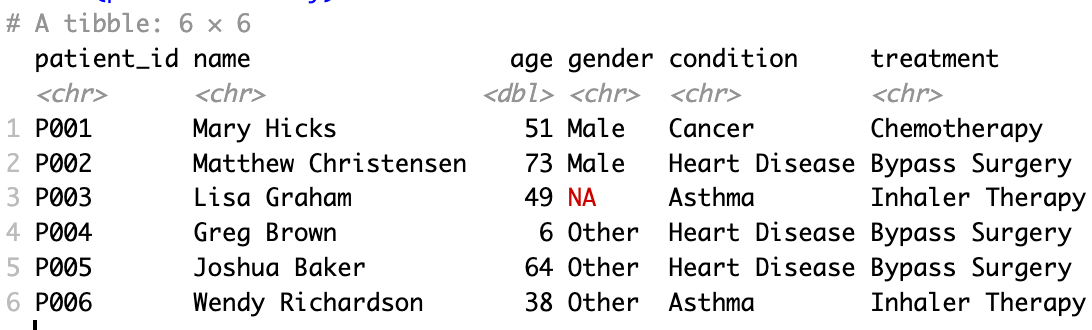


## Question 7
Let's revisit the NOFORC workshop.  
Below is what we completed in class on 9/9.  
**Please note: This contains the skimr library. Make sure you install that package! See the link for instructions: https://github.com/rjenki/BIOS512#adding-packages-to-installr-later.**  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 156711 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): link_url, occurred, city, state, country, shape, summary, reported...
dbl  (1): id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "id"          "link_url"    "occurred"    "city"        "state"      
 [6] "country"     "shape"       "summary"     "reported"    "has_image"  
[11] "explanation"

[1] "Light"     "Circle"    "Triangle"  "Unknown"   "Other"     "Fireball" 
 [7] "Disk"      "Sphere"    "Orb"       "Oval"      "Formation" "Changing" 
[13] "Cigar"     "Rectangle" "Cylinder"  "Flash"     "Diamond"   "Chevron"  
[19] "Egg"       "Teardrop"  "Cone"      "Cross"     "Star"      "Cube"     
[25] "light"     "other"     "triangle"  "circle"    "sphere"    "cylinder" 
[31] "rectangle" "cigar"     "diamond"   "fireball"  "oval"      "changing" 
[37] "egg"       "flash"     "unknown"

id:
	number of NA values 0 (0.00 %)
	number of unique values 156711 (100.00 %)
link_url:
	number of NA values 0 (0.00 %)
	number of unique values 156711 (100.00 %)
occurred:
	number of NA values 299 (0.19 %)
	number of unique values 134472 (85.81 %)
city:
	number of NA values 823 (0.53 %)
	number of unique values 31884 (20.35 %)
state:
	number of NA values 9105 (5.81 %)
	number of unique values 975 (0.62 %)
country:
	number of NA values 0 (0.00 %)
	number of unique values 406 (0.26 %)
shape:
	number of NA values 6343 (4.05 %)
		Light, Circle, Triangle, Unknown, Other, Fireball, Disk, Sphere, Orb, Oval, Formation, Changing, Cigar, Rectangle, Cylinder, Flash, Diamond, Chevron, Egg, Teardrop, Cone, Cross, Star, Cube, light, other, triangle, circle, sphere, cylinder, rectangle, cigar, diamond, fireball, oval, changing, egg, flash, unknown
	number of unique values 39 (0.02 %)
summary:
	number of NA values 74 (0.05 %)
	number of unique values 153832 (98.16 %)
reported:
	number of NA values 0

state,n
<chr>,<int>
0,1
Abu Dhabi,1
Adana Province,1
Addis Ababa,1
Adjara,1
Administrative-Territorial Units of the Left Bank,1
Afyonkarahisar,1
Agder,1
Akita,1


[1] "08/31/2025 21:00" "08/31/2025 02:30" "08/30/2025 11:30"
    [4] "08/30/2025 02:30" "08/19/2025 19:00" "08/13/2025 19:40"
    [7] "08/13/2025 16:22" "08/13/2025 04:40" "08/13/2025 04:30"
   [10] "08/13/2025 03:00" "08/13/2025 01:58" "08/13/2025 00:48"
   [13] "08/12/2025 23:28" "08/12/2025 22:50" "08/12/2025 22:45"
   [16] "08/12/2025 22:35" "08/12/2025 22:34" "08/12/2025 22:33"
   [19] "08/12/2025 22:30" "08/12/2025 22:30" "08/12/2025 21:40"
   [22] "08/12/2025 21:40" "08/12/2025 21:38" "08/12/2025 20:35"
   [25] "08/12/2025 15:30" "08/12/2025 09:25" "08/12/2025 04:34"
   [28] "08/12/2025 02:30" "08/12/2025 01:30" "08/12/2025 00:00"
   [31] "08/11/2025 23:45" "08/11/2025 23:30" "08/11/2025 23:00"
   [34] "08/11/2025 22:00" "08/11/2025 21:10" "08/11/2025 20:47"
   [37] "08/11/2025 13:00" "08/11/2025 12:00" "08/11/2025 11:14"
   [40] "08/11/2025 07:40" "08/11/2025 07:00" "08/11/2025 04:30"
   [43] "08/11/2025 03:49" "08/11/2025 03:00" "08/11/2025 01:35"
   [46] "08/10/2025 23:45" "08/10/2025 23:45" "08/10/2025 21:45"
   [49] "08/10/2025 21:37" "08/10/2025 21:30" "08/10/2025 21:30"
   [52] "08/10/2025 21:20" "08/10/2025 20:56" "08/10/2025 19:50"
   [55] "08/10/2025 11:15" "08/10/2025 03:45" "08/09/2025 23:00"
   [58] "08/09/2025 21:57" "08/09/2025 21:31" "08/09/2025 21:05"
   [61] "08/09/2025 21:00" "08/09/2025 15:07" "08/09/2025 12:00"
   [64] "08/09/2025 11:42" "08/09/2025 05:50" "08/09/2025 04:02"
   [67] "08/09/2025 02:00" "08/09/2025 01:20" "08/08/2025 21:30"
   [70] "08/08/2025 20:45" "08/08/2025 18:15" "08/08/2025 10:28"
   [73] "08/07/2025 22:30" "08/07/2025 22:21" "08/07/2025 21:55"
   [76] "08/07/2025 20:53" "08/07/2025 04:00" "08/07/2025 03:53"
   [79] "08/06/2025 23:34" "08/06/2025 22:30" "08/06/2025 14:50"
   [82] "08/06/2025 02:40" "08/05/2025 22:09" "08/05/2025 21:55"
   [85] "08/05/2025 17:00" "08/05/2025 11:38" "08/05/2025 08:35"
   [88] "08/05/2025 05:15" "08/04/2025 23:57" "08/04/2025 23:10"
   [91] "08/04/2025 22:54" "08/04/2025 22:30" "08/04/2025 22:24"
   [94] "08/04/2025 22:00" "08/04/2025 21:45" "08/04/2025 21:30"
   [97] "08/04/2025 20:35" "08/04/2025 20:30" "08/04/2025 05:07"
  [100] "08/04/2025 05:06" "08/04/2025 04:30" "08/04/2025 02:30"
  [103] "08/04/2025 02:30" "08/04/2025 00:00" "08/03/2025 23:46"
  [106] "08/03/2025 20:37" "08/03/2025 16:19" "08/03/2025 13:15"
  [109] "08/03/2025 10:30" "08/03/2025 09:45" "08/03/2025 04:30"
  [112] "08/03/2025 04:17" "08/03/2025 03:55" "08/03/2025 02:33"
  [115] "08/02/2025 23:50" "08/02/2025 23:29" "08/02/2025 22:50"
  [118] "08/02/2025 22:30" "08/02/2025 22:00" "08/02/2025 21:18"
  [121] "08/02/2025 21:02" "08/02/2025 20:50" "08/02/2025 10:50"
  [124] "08/02/2025 01:17" "08/01/2025 22:51" "08/01/2025 22:10"
  [127] "08/01/2025 21:00" "08/01/2025 21:00" "08/01/2025 20:28"
  [130] "08/01/2025 20:06" "08/01/2025 15:33" "08/01/2025 06:35"
  [133] "08/01/2025 04:30" "08/01/2025 01:20" "07/31/2025 22:40"
  [136] "07/31/2025 18:00" "07/31/2025 05:07" "07/31/2025 03:00"
  [139] "07/31/2025 00:15" "07/31/2025 00:05" "07/30/2025 22:30"
  [142] "07/30/2025 22:30" "07/30/2025 22:26" "07/30/2025 22:10"
  [145] "07/30/2025 21:09" "07/30/2025 18:43" "07/30/2025 18:12"
  [148] "07/30/2025 14:30" "07/30/2025 05:40" "07/30/2025 05:20"
  [151] "07/30/2025 04:02" "07/30/2025 02:11" "07/30/2025 02:00"
  [154] "07/30/2025 00:30" "07/29/2025 23:46" "07/29/2025 21:45"
  [157] "07/29/2025 21:30" "07/29/2025 15:00" "07/29/2025 11:40"
  [160] "07/28/2025 23:30" "07/28/2025 22:39" "07/28/2025 22:33"
  [163] "07/28/2025 22:20" "07/28/2025 22:00" "07/28/2025 20:39"
  [166] "07/28/2025 12:45" "07/28/2025 04:19" "07/28/2025 02:30"
  [169] "07/27/2025 23:30" "07/27/2025 22:30" "07/27/2025 22:22"
  [172] "07/27/2025 22:15" "07/27/2025 21:00" "07/27/2025 19:35"
  [175] "07/27/2025 04:50" "07/26/2025 23:40" "07/26/2025 19:30"
  [178] "07/26/2025 15:40" "07/26/2025 12:57" "07/26/2025 11:00"
  [181] "07/26/2025 06:00" "07/26/2025 05:00" "07/26/2025 04:00"
  [184] "07/26/2025 02:30" "07/25/2025 

d1,d2,d3,d4,d5
<chr>,<chr>,<chr>,<chr>,<chr>
08,31,2025,21,00
08,31,2025,02,30
08,30,2025,11,30
08,30,2025,02,30
08,19,2025,19,00
08,13,2025,19,40
08,13,2025,16,22
08,13,2025,04,40
08,13,2025,04,30


country,n
<chr>,<int>
USA,138705
Canada,6216
United Kingdom,3805
Australia,1060
India,571
Mexico,542
Brazil,267
Germany,254
South Africa,244


state,n
<chr>,<int>
CA,16913
NA,9105
FL,8717
WA,7510
TX,6548
NY,6224
PA,5292
AZ,5267
OH,4650


shape,n
<chr>,<int>
Light,28571
Circle,15403
Triangle,13823
Unknown,10543
Other,10519
Fireball,10069
Disk,9216
Sphere,8033
Orb,7364


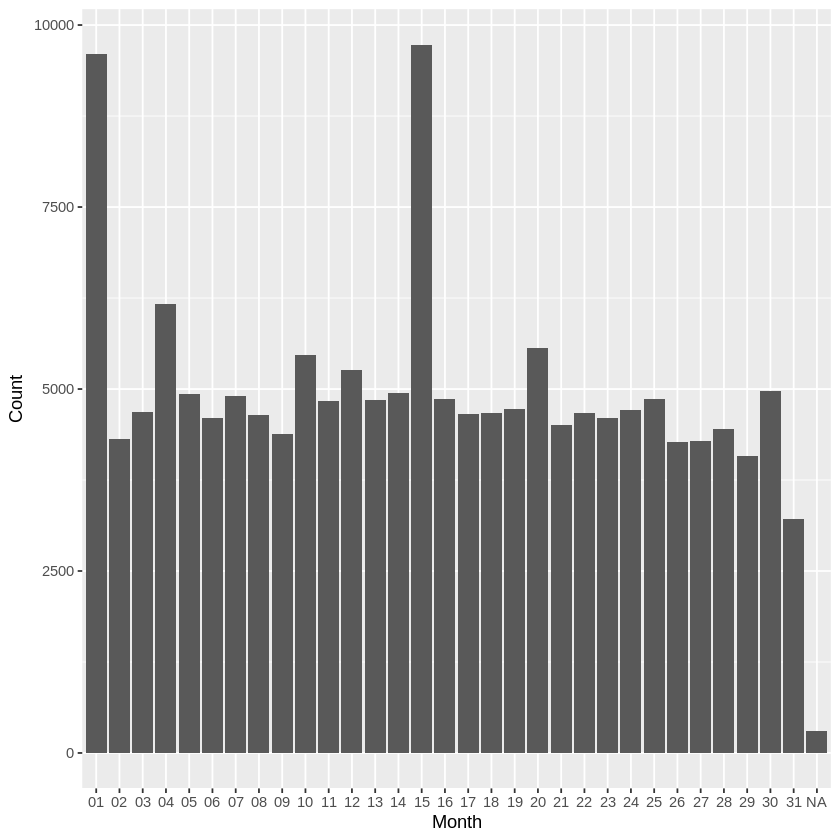


Column: shape 
Number of unique values: 24 
 [1] "changing"  "chevron"   "cigar"     "circle"    "cone"      "cros"     
 [7] "cube"      "cylinder"  "diamond"   "disk"      "egg"       "fireball" 
[13] "flash"     "formation" "light"     "orb"       "other"     "oval"     
[19] "rectangle" "sphere"    "star"      "teardrop"  "triangle"  "unknown"  

Column: reported 
Number of unique values: 0 
POSIXct of length 0

Column: has_image 
Number of unique values: 1 
[1] "y"

Column: explanation 
Number of unique values: 47 
 [1] "aircraft"            "animal"              "aurora"             
 [4] "aurora boreali"      "ball lightning"      "balloon"            
 [7] "bat"                 "bird"                "blimp"              
[10] "boat"                "camera anomaly"      "chinese lantern"    
[13] "cloud"               "comet"               "contrail"           
[16] "debri"               "dream"               "drone"              
[19] "firework"            "flare"             

state,n
<chr>,<int>
CA,16904
FL,8706
WA,7506
TX,6548
NY,6223
PA,5288
AZ,5264
OH,4647
IL,4443


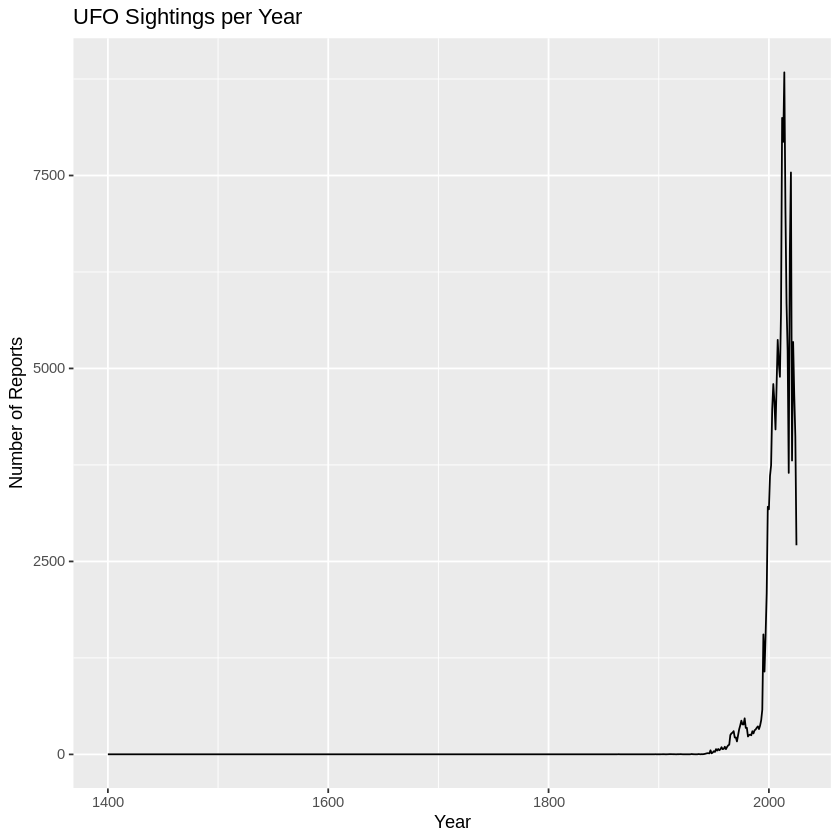

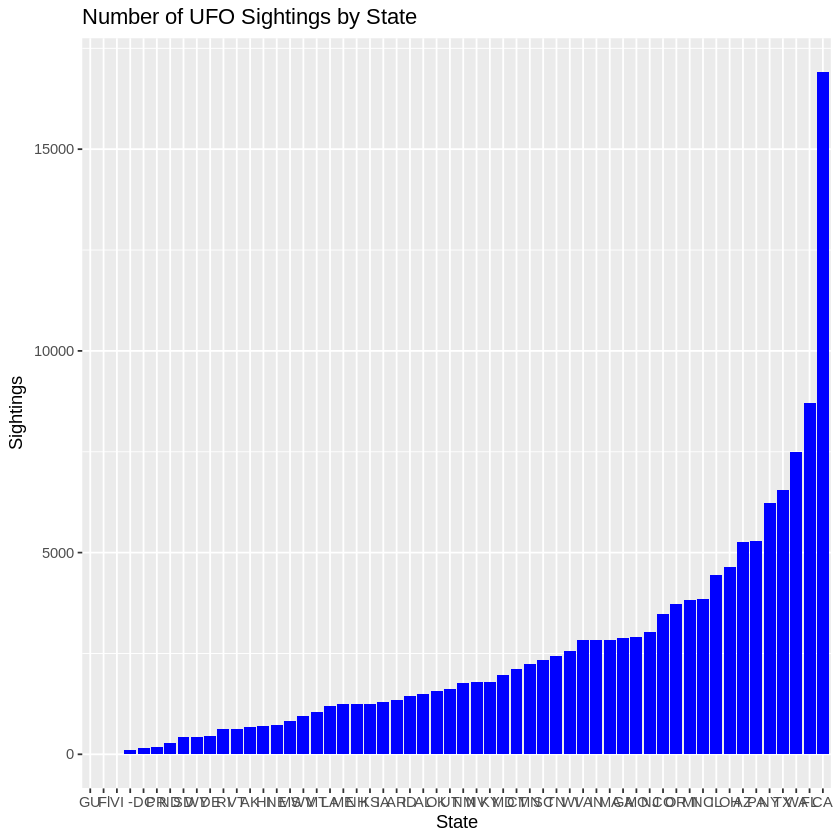

In [17]:
install.packages("skimr")
library(tidyverse)
library(skimr)

# Load UFO sightings data from a GitHub CSV
df <- read_csv("https://raw.githubusercontent.com/Vincent-Toups/bios512/refs/heads/main/nuforc_workshop/nuforc_sightings.csv")

# Read column names
names(df)

# Count the occurrences of each unique 'shape' value
unique_vals <- df$shape %>% table()

# Sort the counts of shapes in descending order and get the names
unique_vals %>% sort(decreasing = T) %>% names()

# Store column names in a vector
column_names <- names(df)

# Total number of rows in the dataset
n_total <- nrow(df)

# Loop over each column to get basic summary stats
for(col in column_names) {
  values <- df[[col]];        # Extract column
  n_na <- sum(is.na(values))  # Count number of NA values

  unique_vals <- values %>% table() %>% sort(decreasing = T)  # Count unique values and sort them by frequency
  n_unique <- length(unique_vals)

  cat(sprintf("%s:\n", col))  # Print column name
  cat(sprintf("\tnumber of NA values %d (%0.2f %%)\n", n_na, 100*n_na/n_total)) # Print number and percent of NA values
  if(n_unique < 150) cat(sprintf("\t\t%s\n", names(unique_vals) %>% paste(collapse=", "))) # If column has fewer than 150 unique values, print them all
  cat(sprintf("\tnumber of unique values %d (%0.2f %%)\n", length(unique_vals), # Print number and percent of unique values
    100*length(unique_vals)/n_total))
}

# Count number of reports per state and sort ascending
df %>% group_by(state) %>% tally() %>% arrange(n)

# Extract the 'occurred' column as a vector
df %>% pull(occurred)

# Helper function: nth(n) returns a function that extracts the nth element of a vector
nth <- function(n) function(a) a[n]

# Custom function to parse date strings by splitting on - / space : characters
parse_date <- function(s){
                          space_split <- s %>% str_split("[-/ :]")
                          tibble(d1 = Map(nth(1), space_split) %>% as.character(),
                                      d2 = Map(nth(2), space_split) %>% as.character(),
                                      d3 = Map(nth(3), space_split) %>% as.character(),
                                      d4 = Map(nth(4), space_split) %>% as.character(),
                                      d5 = Map(nth(5), space_split) %>% as.character())
                          }

# Apply the parsing function to the 'occurred' column
date_stuff <- parse_date(df %>% pull(occurred))
head(date_stuff, 10)

# Histogram of the second component of the split date (likely month)
ggplot (date_stuff, aes(d2))+ geom_bar() + labs(x = "Month", y = "Count")

# Install and load the skimr package for a nicer summary
library(skimr)

# Quick summary of the dataset
skim_output <- skimr::skim(df)

# Count occurrences for categorical columns
df %>% count(country, sort = TRUE)
df %>% count(state, sort = TRUE)
df %>% count(shape, sort = TRUE)

# Convert 'occurred' and 'reported' to proper date-time format using lubridate
df <- df %>%
  mutate(
  occurred = lubridate::mdy_hm(occurred, quiet = TRUE),
  reported = lubridate::mdy_hm(reported, quiet = TRUE)
  )

# Plot UFO sightings per year
df %>%
  filter(!is.na(occurred)) %>%
  count(year = lubridate::year(occurred)) %>%
  ggplot(aes(year, n)) +
  geom_line() +
    labs(title = "UFO Sightings per Year", x = "Year", y = "Number of Reports")

 #CODE THAT I ADDED
clean_entries <- function(entry) {
  entry %>%
    str_to_lower() %>%
    str_trim() %>%
    str_replace_all("-", " ") %>%
    str_replace_all("\\?", "") %>%
    str_replace_all("[()]", " ") %>%
    str_replace_all("s$", "") %>%

    str_squish()
}
threshold <- 150
for (col in names(df)) {
  values <- df[[col]]
  if (is.factor(values)) values <- as.character(values)
  if (is.character(values)) values <- clean_entries(values)

  vals <- sort(unique(values))
  n_unique <- length(vals)

  if (n_unique < threshold) {
    cat("\nColumn:", col, "\n")
    cat("Number of unique values:", n_unique, "\n")

    print(vals)
  }
  }


state_counts <- df %>%
  filter(country == "USA") %>%
  count(state, sort = TRUE) %>%
  filter(n > 1)

head(state_counts, 20)

  state_counts <- df %>%
filter(country == "USA") %>%
count(state, sort = TRUE) %>%
filter(n > 1)

ggplot(state_counts, aes(x = reorder(state, n), y = n)) +
geom_col(fill = "blue") +

labs(
  title = "Number of UFO Sightings by State",
  x = "State",
  y = "Sightings"
  )

For the columns that have a low (relative to this dataset, which has ~150,000 observation) number of unique values, create a table that lists these unique values in ascending order.

## Question 8
Make a plot of number of UFO sightings by state (United States only). You can filter out states that only have one observation.

Results can be seen in question 7 code box

```
state_counts <- df %>%
filter(country == "USA") %>%
count(state, sort = TRUE) %>%
filter(n > 1)

ggplot(state_counts, aes(x = reorder(state, n), y = n)) +
geom_col(fill = "blue") +

labs(
  title = "Number of UFO Sightings by State",
  x = "State",
  Y = "Sightings"
  )
```

